In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as st
import random
from math import floor
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
laplacian = np.array([[0.05,0.2,0.05],[0.2,-1,0.2],[0.05,0.2,0.05]])

In [ ]:
a = np.ones((3,3))
b = np.ones((3,3))*2
a/(a+b)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

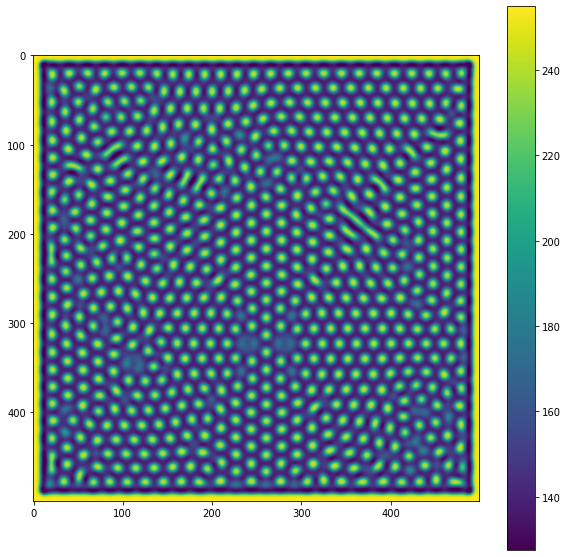

In [ ]:
len_X = 500
len_Y = 500

dim = (len_X,len_Y)

showAnimation = True
numSteps = 100
stepsPerFrame = 100

# Diffusion Rates
d_a = 1.0
d_b = 0.5
f = 0.014
k = 0.040
step = 1.0

A = np.ones(dim)
B = np.zeros(dim)

# Seeding 
# B[70:80,80:85] = 1
# B[50:55,50:55] = 1 
# B[60:80,80:85] = 1

# Random blobs
num_seeds = 5
min_blob = 5
max_blob = 20

for i in range(num_seeds):
    x = random.randint(0, len_X)
    y = random.randint(0, len_Y)
    d_x = random.randint(min_blob, max_blob)
    d_y = random.randint(min_blob, max_blob)
    B[x - floor(d_x/2): x + floor(d_x/2), y - floor(d_y/2): y + floor(d_y/2)] = 1

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

def getF():
  #return (np.ones((len_X, 1)) * np.linspace(0.006, 0.06, len_X)).T
  return f

def getK():
  #return np.ones((len_Y, 1)) * np.linspace(0.050, 0.07, len_Y)
  return k

def getD_B():
  #return 0.5 - gkern(len_X, 3)*2000
  return d_b

def initPlot():
  pos.set_array(A)
  return pos,

def simulationTick():
  global A
  global B
  A_lp = signal.convolve2d(A, laplacian, mode='same')#, boundary='wrap')
  B_lp = signal.convolve2d(B, laplacian, mode='same')#, boundary='wrap')

  A = A + (d_a * A_lp - A * np.power(B, 2) + getF() * (1 - A)) * step
  B = B + (getD_B() * B_lp + A * np.power(B, 2) - (getK() + getF()) * B) * step

def updatePlot(frame):
  global A
  global B
  for i in range(stepsPerFrame):
    simulationTick()
  img = (A / (A + B)) * 255.0
  pos.set_array(img)
  return pos,

if not showAnimation:
  for i in range(numSteps * stepsPerFrame):
    simulationTick()

plt.show()

# print(A)
# print(B)
img = (A / (A + B)) * 255.0

fig, (ax1) = plt.subplots(figsize=(10, 10))
pos = ax1.imshow(img)
fig.colorbar(pos, ax=ax1)
np.sum(B)

if showAnimation:
  anim = animation.FuncAnimation(fig, updatePlot, frames=numSteps,
                                 init_func=initPlot, blit=True)
HTML(anim.to_html5_video())

# plt.show()
